In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import random

In [2]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "grid.linewidth": 0.2})

# Raw Data From Keras

In [3]:
raw_data = '''
loss: 1.7310 - acc: 0.4985 - val_loss: 1.4192 - val_acc: 0.5811
loss: 1.4644 - acc: 0.5682 - val_loss: 1.3431 - val_acc: 0.6010
loss: 1.4100 - acc: 0.5829 - val_loss: 1.3073 - val_acc: 0.6120
loss: 1.3817 - acc: 0.5904 - val_loss: 1.2868 - val_acc: 0.6171
loss: 1.3637 - acc: 0.5954 - val_loss: 1.2732 - val_acc: 0.6209
loss: 1.3509 - acc: 0.5990 - val_loss: 1.2625 - val_acc: 0.6230
loss: 1.3414 - acc: 0.6015 - val_loss: 1.2561 - val_acc: 0.6265
loss: 1.3331 - acc: 0.6037 - val_loss: 1.2492 - val_acc: 0.6274
loss: 1.3265 - acc: 0.6055 - val_loss: 1.2438 - val_acc: 0.6293
loss: 1.3201 - acc: 0.6074 - val_loss: 1.2401 - val_acc: 0.6302
loss: 1.3149 - acc: 0.6087 - val_loss: 1.2347 - val_acc: 0.6319
loss: 1.3104 - acc: 0.6099 - val_loss: 1.2296 - val_acc: 0.6329
loss: 1.3053 - acc: 0.6114 - val_loss: 1.2272 - val_acc: 0.6328
loss: 1.3014 - acc: 0.6120 - val_loss: 1.2238 - val_acc: 0.6344
loss: 1.2978 - acc: 0.6130 - val_loss: 1.2213 - val_acc: 0.6347
loss: 1.2943 - acc: 0.6140 - val_loss: 1.2173 - val_acc: 0.6362
loss: 1.2914 - acc: 0.6146 - val_loss: 1.2151 - val_acc: 0.6371
loss: 1.2890 - acc: 0.6155 - val_loss: 1.2140 - val_acc: 0.6371
loss: 1.2864 - acc: 0.6163 - val_loss: 1.2112 - val_acc: 0.6379
loss: 1.2842 - acc: 0.6167 - val_loss: 1.2096 - val_acc: 0.6380
loss: 1.2812 - acc: 0.6179 - val_loss: 1.2083 - val_acc: 0.6389
loss: 1.2789 - acc: 0.6183 - val_loss: 1.2082 - val_acc: 0.6384
loss: 1.2772 - acc: 0.6185 - val_loss: 1.2053 - val_acc: 0.6395
loss: 1.2748 - acc: 0.6193 - val_loss: 1.2025 - val_acc: 0.6409
loss: 1.2732 - acc: 0.6197 - val_loss: 1.2008 - val_acc: 0.6408
loss: 1.2715 - acc: 0.6204 - val_loss: 1.1990 - val_acc: 0.6421
loss: 1.2695 - acc: 0.6207 - val_loss: 1.1978 - val_acc: 0.6417
loss: 1.2675 - acc: 0.6211 - val_loss: 1.1972 - val_acc: 0.6419
loss: 1.2658 - acc: 0.6215 - val_loss: 1.1951 - val_acc: 0.6419
loss: 1.2642 - acc: 0.6220 - val_loss: 1.1929 - val_acc: 0.6425
loss: 1.2626 - acc: 0.6222 - val_loss: 1.1928 - val_acc: 0.6430
loss: 1.2613 - acc: 0.6229 - val_loss: 1.1913 - val_acc: 0.6437
loss: 1.2600 - acc: 0.6230 - val_loss: 1.1917 - val_acc: 0.6438
loss: 1.2586 - acc: 0.6236 - val_loss: 1.1894 - val_acc: 0.6436
'''

In [4]:
def parse_data(data):
    init  = [
        ['inf', '0', 'inf', '0']
    ]
    lines = [
        [datum.split(': ')[-1] for datum in l]
            for l in
        [line.split(' - ') for line in data.splitlines() if line]
    ]
    return pd.DataFrame(init + lines, columns=['loss', 'acc', 'val_loss', 'val_acc']).applymap(float)

def plot_curves(cols, title='Network Training Progress', xlabel='Epochs', ylabel='Curves', **kwargs):
    ax = df[cols].plot(figsize=(14, 8),
                       title=title,
                       kind='line',
                       colormap='Pastel2',
                       markersize=14,
                       marker='.',
                       **kwargs)
    ax.set(xlabel=ylabel, ylabel=ylabel)
    sns.despine(ax=ax);

In [5]:
df = parse_data(raw_data)

# Plots

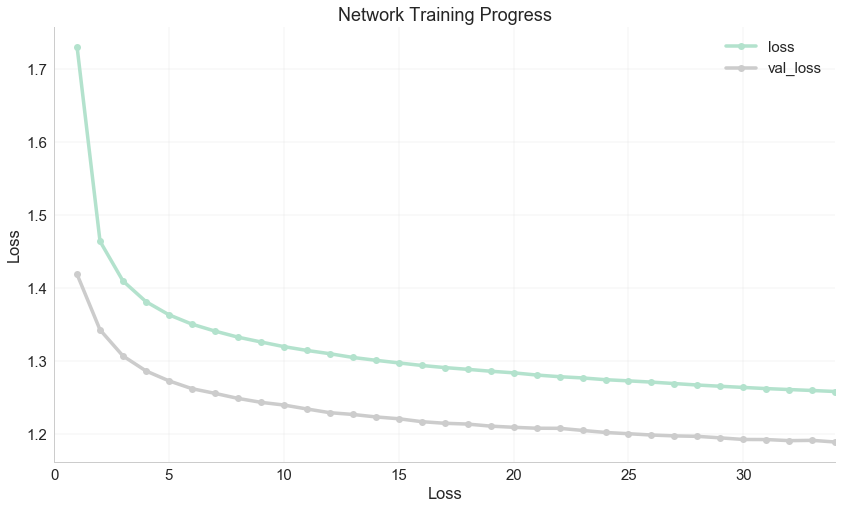

In [6]:
plot_curves(['loss', 'val_loss'], ylabel='Loss')

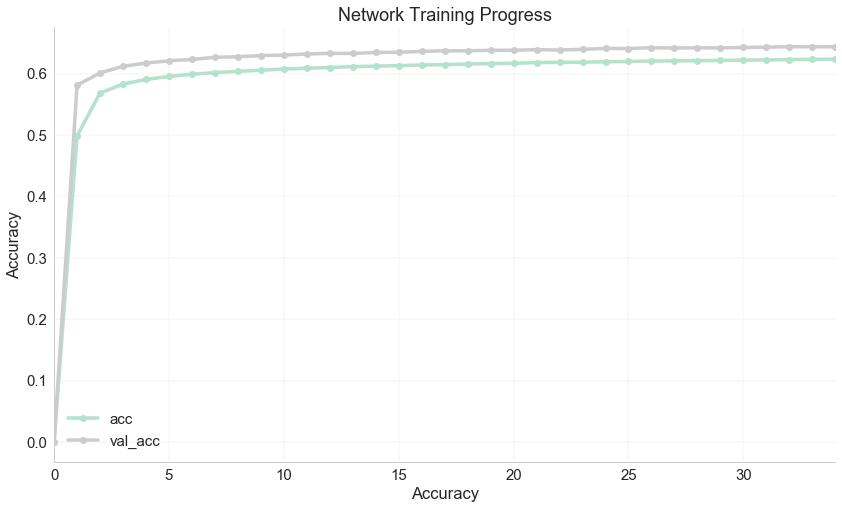

In [7]:
plot_curves(['acc', 'val_acc'], ylabel='Accuracy')

# Check Where Validation Loss Improved

In [8]:
val_loss_diff = pd.Series(df.val_loss.values[:-1] - df.val_loss.values[1:])

val_loss_diff

0          inf
1     0.076100
2     0.035800
3     0.020500
4     0.013600
5     0.010700
6     0.006400
7     0.006900
8     0.005400
9     0.003700
10    0.005400
11    0.005100
12    0.002400
13    0.003400
14    0.002500
15    0.004000
16    0.002200
17    0.001100
18    0.002800
19    0.001600
20    0.001300
21    0.000100
22    0.002900
23    0.002800
24    0.001700
25    0.001800
26    0.001200
27    0.000600
28    0.002100
29    0.002200
30    0.000100
31    0.001500
32   -0.000400
33    0.002300
dtype: float64

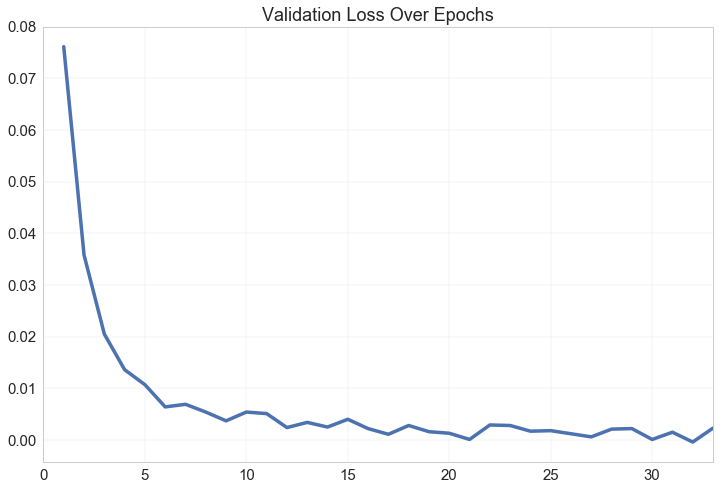

In [9]:
val_loss_diff.plot(figsize=(12,8),
                   title='Validation Loss Over Epochs');